# Concrete Compressive Strength Dataset

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing Concrete Compressive Strength Dataset
dataset = pd.read_excel('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/Concrete Compressive Strength/data/Concrete_Data.xls',header=1)
data = pd.DataFrame(dataset)

In [2]:
# Check if dataset has null values
result = dataset.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column")
print(result.sum())

-> Contains Missing values                 False
-> Total Number of Missing values:         0
-> Number of Missing values by column
540            0
0              0
0.1            0
162            0
2.5            0
1040           0
676            0
28             0
79.98611076    0
dtype: int64


In [10]:
X = data.iloc[:, :8].values
Y = data.iloc[:, 8].values

print(data)
print(X.shape)
print(Y.shape)

        540      0    0.1    162   2.5    1040    676   28  79.98611076
0     540.0    0.0    0.0  162.0   2.5  1055.0  676.0   28    61.887366
1     332.5  142.5    0.0  228.0   0.0   932.0  594.0  270    40.269535
2     332.5  142.5    0.0  228.0   0.0   932.0  594.0  365    41.052780
3     198.6  132.4    0.0  192.0   0.0   978.4  825.5  360    44.296075
4     266.0  114.0    0.0  228.0   0.0   932.0  670.0   90    47.029847
...     ...    ...    ...    ...   ...     ...    ...  ...          ...
1024  276.4  116.0   90.3  179.6   8.9   870.1  768.3   28    44.284354
1025  322.2    0.0  115.6  196.0  10.4   817.9  813.4   28    31.178794
1026  148.5  139.4  108.6  192.7   6.1   892.4  780.0   28    23.696601
1027  159.1  186.7    0.0  175.6  11.3   989.6  788.9   28    32.768036
1028  260.9  100.5   78.3  200.6   8.6   864.5  761.5   28    32.401235

[1029 rows x 9 columns]
(1029, 8)
(1029,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give 93.7948904411872 accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressior']
models = [SVR(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          AdaBoostRegressor(),
          GaussianProcessRegressor(kernel=kernel),
          LinearRegression(),
          MLPRegressor()]

param_distributions = {
    'SVR': {'kernel': ['linear', 'rbf','poly'],'C':[1.5, 10]},
    'DecisionTreeRegressor': {'max_depth': [10, 20, 90, 100, None],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10]},
    'RandomForestRegressor': {'max_depth': [10, 20, 90, 100, None],'n_estimators': [16, 200, 600, 800],'bootstrap': [True, False],},
    'AdaBoostRegressor': {'n_estimators': [16, 200, 600, 800],'learning_rate' : [0.01,0.05,0.1,0.3,1],'loss' : ['linear', 'square', 'exponential']},
    'GaussianProcessRegressor': {'normalize_y': ['True','False']},
    'LinearRegression': {},
    'MLPRegressior': {'hidden_layer_sizes': [(100,),(30,20)],'activation':['tanh', 'relu'],'learning_rate' : [0.01,0.05,0.1,0.3,1],'max_iter': [100,200]},
}

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    gridcv = GridSearchCV(estimator = model, param_grid = param_distributions[names[counter]], verbose=1,cv=3)
    gridcv.fit(X_train, Y_train)
    grid_accuracy_test = gridcv.best_estimator_.score(X_test, Y_test)
#     grid_accuracy_test  = sklearn.metrics.accuracy_score(Y_test,  gridcv.best_estimator_.predict(X_test))
    accuracy[counter] = grid_accuracy_test*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for SVR: 58.228418779263116
Accuracy for DecisionTreeRegressor: 64.2658729045358
Accuracy for RandomForestRegressor: 47.130331628675094
Accuracy for AdaBoostRegressor: 76.33346180242485
Accuracy for GaussianProcessRegressor: 53.36807037966352
Accuracy for LinearRegression: 55.59034448724156
Accuracy for MLPRegressor: 59.09379579536682


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Concrete Compressive Strength Dataset model accuracy')

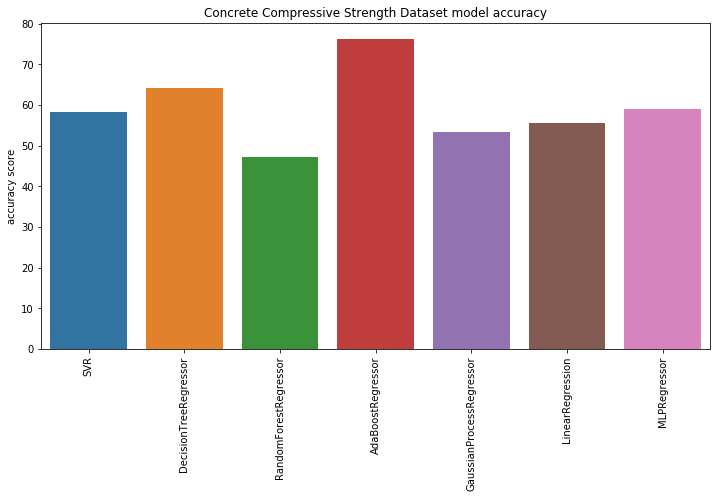

In [12]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Concrete Compressive Strength Dataset model accuracy')